In [1]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
import pandas as pd
import numpy as np
import datetime

## DATASET 1: nft_sales.csv
## used for analysis

In [3]:
#data1=pd.read_csv("/content/drive/MyDrive/DSCI 560 Project/data/nft_sales.csv")
data1=pd.read_csv('Data/nft_sales.csv')

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data1.head()

,Unnamed: 0,collection_slug,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_id,event_time,event_auction_type,event_contract_address,event_quantity,event_payment_symbol,event_total_price
0,0,rarible,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,"Piece of art, Daft Punk, always in our hears.\...",2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/DRaz3AD6SNrC...,80762268,2021-02-27T23:59:19.806617,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.070000
1,1,rarebit-bunnies,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,🐇♥️ When it comes to high kicks this Rarebit's...,2021-01-21T20:43:08.113711,https://opensea.io/assets/0x61bd6b10c7bf3e548f...,https://lh3.googleusercontent.com/zI7j5Gc8jcJ_...,80762142,2021-02-27T23:58:48.806004,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.150000
2,2,rarible,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,Meditation by Diana.\n\nMinted only 20 NFT col...,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/VxNjqW9b0yKv...,80762131,2021-02-27T23:58:46.805355,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.001000
3,3,rarible,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,This is one of the first NFTs in human history,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/lwLuEUsHn2bd...,80762121,2021-02-27T23:58:45.675259,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.000647
4,4,chainguardians,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,One of the original androids created within th...,2019-11-17T21:00:18.404059,https://opensea.io/assets/0x4fe99deb8f0be517c3...,https://lh3.googleusercontent.com/ODEhFsO_E_O8...,80762099,2021-02-27T23:58:43.700969,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.200000


In [5]:
data1.shape

(108147, 17)

In [6]:
data1.columns

Index(['Unnamed: 0', 'collection_slug', 'collection_name', 'collection_url',
       'asset_id', 'asset_name', 'asset_description', 'asset_contract_date',
       'asset_url', 'asset_img_url', 'event_id', 'event_time',
       'event_auction_type', 'event_contract_address', 'event_quantity',
       'event_payment_symbol', 'event_total_price'],
      dtype='object')

In [7]:
data1['event_auction_type'].fillna("dutch", inplace = True)

In [8]:
data1.dtypes

Unnamed: 0                  int64
collection_slug            object
collection_name            object
collection_url             object
asset_id                    int64
asset_name                 object
asset_description          object
asset_contract_date        object
asset_url                  object
asset_img_url              object
event_id                    int64
event_time                 object
event_auction_type         object
event_contract_address     object
event_quantity             object
event_payment_symbol       object
event_total_price         float64
dtype: object

In [9]:
data1['event_time']= pd.to_datetime(data1['event_time'])

In [10]:
data1['date'] = data1['event_time'].dt.date
data1['time'] = data1['event_time'].dt.time


In [11]:
data1.loc[data1["event_payment_symbol"] == "WETH", "event_payment_symbol"] = 'ETH'
data1['event_payment_symbol'].value_counts()

ETH       106409
MANA         455
DAI          273
SAND         162
USDC         140
UNI          111
PGU           98
RARI          76
ELAND         73
GALA          39
REVV          39
ABST          36
MEME          34
BONDLY        27
DENA          18
ECAT          18
ARCONA        17
SMTS          12
ROPE          10
TRSH           8
ENJ            7
WHALE          6
ART            5
KLTR           5
MGDv2          5
CUBE           4
ASLT           4
SKULL          4
ATRI           4
PPDEX          3
DHC            3
MORK           3
WCK            3
SURF           2
GUSD           2
GR1M           2
HUE            2
CRED           1
MBC            1
WIPC           1
KAP            1
NUGS           1
0xBTC          1
VI             1
FTM            1
YUMI           1
BONES          1
FUD            1
BAT            1
NDR            1
Name: event_payment_symbol, dtype: int64

In [12]:
data1 = data1[data1.event_payment_symbol == 'ETH']
data1['event_payment_symbol'].value_counts()

ETH    106409
Name: event_payment_symbol, dtype: int64

In [13]:
data1['asset_img_url']

0         https://lh3.googleusercontent.com/DRaz3AD6SNrC...
1         https://lh3.googleusercontent.com/zI7j5Gc8jcJ_...
2         https://lh3.googleusercontent.com/VxNjqW9b0yKv...
3         https://lh3.googleusercontent.com/lwLuEUsHn2bd...
4         https://lh3.googleusercontent.com/ODEhFsO_E_O8...
                                ...                        
108142    https://lh3.googleusercontent.com/XzrOx1uNWMki...
108143    https://lh3.googleusercontent.com/wLsjC0cFEFED...
108144    https://lh3.googleusercontent.com/n45zWe8BSxx3...
108145    https://lh3.googleusercontent.com/zULek6_cD-RY...
108146    https://lh3.googleusercontent.com/OffGc0XyzPAD...
Name: asset_img_url, Length: 106409, dtype: object

In [14]:
data1.loc[:,['collection_slug','collection_name']] # same name, can drop slug

,collection_slug,collection_name
0,rarible,Rarible
1,rarebit-bunnies,Rarebit Bunnies
2,rarible,Rarible
3,rarible,Rarible
4,chainguardians,ChainGuardians
...,...,...
108142,pixel-glass-by-kai,Pixel Glass by kai
108143,rarible,Rarible
108144,cryptokitties,CryptoKitties
108145,league-of-kingdoms,League of Kingdoms (Ethereum)


In [15]:
data1.drop(columns=['Unnamed: 0', 'event_auction_type','event_time','event_payment_symbol','asset_img_url','collection_slug'], axis = 1,inplace=True)


In [16]:
data1.head()

,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,event_id,event_contract_address,event_quantity,event_total_price,date,time
0,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,"Piece of art, Daft Punk, always in our hears.\...",2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,80762268,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,0.070000,2021-02-27,23:59:19.806617
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,🐇♥️ When it comes to high kicks this Rarebit's...,2021-01-21T20:43:08.113711,https://opensea.io/assets/0x61bd6b10c7bf3e548f...,80762142,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,0.150000,2021-02-27,23:58:48.806004
2,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,Meditation by Diana.\n\nMinted only 20 NFT col...,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,80762131,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,0.001000,2021-02-27,23:58:46.805355
3,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,This is one of the first NFTs in human history,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,80762121,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,0.000647,2021-02-27,23:58:45.675259
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,One of the original androids created within th...,2019-11-17T21:00:18.404059,https://opensea.io/assets/0x4fe99deb8f0be517c3...,80762099,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,0.200000,2021-02-27,23:58:43.700969


# Dataset2: nft.csv
## used for model

In [80]:
#data2=pd.read_csv("/content/drive/MyDri|ve/DSCI 560 Project/data/nft.csv")
data2=pd.read_csv("Data/nft.csv")

c:\users\divya\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,2,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [81]:
# data2=pd.read_csv("/content/drive/MyDrive/DSCI 560 Project/data/nft.csv")
data2.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games


In [82]:
data2.shape

(1000000, 24)

In [83]:
data2['Category'].unique()

array(['Games', 'Art', 'Other', 'Collectible'], dtype=object)

In [84]:
data2['Collection'].unique()

array(['Godsunchained', 'Cryptokitties', 'oghodlergang', 'anyo.b1', 'b1',
       'thingsyousay', 'kaleidoscope', 'worth1kwords', 'gpk.topps',
       'officialhero', 'altermoments', 'parodykidss2', 'rumspringart',
       'tonextonenft', 'tone2studios', 'krwingerarts', 'tone2tonenft',
       'cattifamily1', 'splintercard', 'maskofsatosh', 'badcryptonft',
       'joeexotiger1', 'minthillmoby', '3dprintednft', 'games',
       'politicaljok', 'allthetowers', 'spiritmole11', 'parodykidsuk',
       'niftywizards', 'goblinsonwax', 'cheesmansart', 'dopestickers',
       'alexartworks', 'thebrokenart', 'pepe.hero', 'matthew12345',
       'linuxalllday', 'dripnwithwax', 'electionstwt', 'presidentiaz',
       'ruummspringa', 'pkidsredeem1', 'itsthepeople', 'skywalkerwax',
       'shattnermeme', 'vtgpostcards', 'organicpics1', 'numberonehub',
       'thisismylife', 'badges.b1', 'rumspringa12', 'uplandfanart',
       '3dpngtesting', 'solarsystem1', 'wizardxcards', 'niftysticker',
       'oregon4life

In [85]:
data2[data2['ID_token'] == 82230857.0]


,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games


In [86]:
data2['Datetime_updated'] = pd.to_datetime(data2['Datetime_updated'])
data2['Datetime_updated_seconds'] = pd.to_datetime(data2['Datetime_updated_seconds'])

In [87]:
data2.isna().sum()

Smart_contract               961610
ID_token                          0
Transaction_hash              38738
Seller_address                    0
Seller_username             1000000
Buyer_address                     0
Buyer_username              1000000
Image_url_1                     749
Image_url_2                  962359
Image_url_3                  962359
Image_url_4                  962359
Price_Crypto                      0
Crypto                            0
Price_USD                       348
Name                        1000000
Description                 1000000
Collection                        0
Market                            0
Datetime_updated                  0
Datetime_updated_seconds          0
Permanent_link              1000000
Unique_id_collection              0
Collection_cleaned                0
Category                          0
dtype: int64

In [88]:
data2.drop(columns=['Smart_contract','Seller_username','Buyer_username','Image_url_2','Image_url_3','Image_url_4','Name','Description','Permanent_link','Unique_id_collection'],axis=1,inplace=True)

In [89]:
data2['Crypto'].value_counts()

ETH    961610
WAX     38390
Name: Crypto, dtype: int64

In [90]:
#datax=data2[data2['Crypto']=='ETH']
data2['Crypto'].value_counts()

ETH    961610
WAX     38390
Name: Crypto, dtype: int64

In [91]:
data2['Category'].value_counts()

Art            725412
Games          260825
Collectible     11335
Other            2428
Name: Category, dtype: int64

In [92]:
data2['Collection'].unique()

array(['Godsunchained', 'Cryptokitties', 'oghodlergang', 'anyo.b1', 'b1',
       'thingsyousay', 'kaleidoscope', 'worth1kwords', 'gpk.topps',
       'officialhero', 'altermoments', 'parodykidss2', 'rumspringart',
       'tonextonenft', 'tone2studios', 'krwingerarts', 'tone2tonenft',
       'cattifamily1', 'splintercard', 'maskofsatosh', 'badcryptonft',
       'joeexotiger1', 'minthillmoby', '3dprintednft', 'games',
       'politicaljok', 'allthetowers', 'spiritmole11', 'parodykidsuk',
       'niftywizards', 'goblinsonwax', 'cheesmansart', 'dopestickers',
       'alexartworks', 'thebrokenart', 'pepe.hero', 'matthew12345',
       'linuxalllday', 'dripnwithwax', 'electionstwt', 'presidentiaz',
       'ruummspringa', 'pkidsredeem1', 'itsthepeople', 'skywalkerwax',
       'shattnermeme', 'vtgpostcards', 'organicpics1', 'numberonehub',
       'thisismylife', 'badges.b1', 'rumspringa12', 'uplandfanart',
       '3dpngtesting', 'solarsystem1', 'wizardxcards', 'niftysticker',
       'oregon4life

In [93]:
data2['Collection'].value_counts().head(15)

Cryptokitties    725400
Godsunchained    236210
kogsofficial      24216
officialhero       6307
gpk.topps          3393
niftywizards        810
upliftart           322
cheesmansart        272
chibisglobal        239
pepe.hero           179
dopestickers        179
kaleidoscope        141
krwingerarts        139
niftysticker        122
uplandfanart         88
Name: Collection, dtype: int64

In [94]:
collections=list(data2['Collection'].value_counts().head(15).index)
collections

['Cryptokitties',
 'Godsunchained',
 'kogsofficial',
 'officialhero',
 'gpk.topps',
 'niftywizards',
 'upliftart',
 'cheesmansart',
 'chibisglobal',
 'pepe.hero',
 'dopestickers',
 'kaleidoscope',
 'krwingerarts',
 'niftysticker',
 'uplandfanart']

In [95]:
data2=data2.loc[data2['Collection'].isin(collections)]

In [96]:
data2.drop(columns=['Market','Collection_cleaned','Transaction_hash'],axis=1,inplace=True)

In [97]:
data2.head()

,ID_token,Seller_address,Buyer_address,Image_url_1,Price_Crypto,Crypto,Price_USD,Collection,Datetime_updated,Datetime_updated_seconds,Category
0,87094722.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
1,73044643.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=79&q=4,0.0013,ETH,0.197067,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
2,17107482.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
3,82230857.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=227&q=4,0.0022,ETH,0.333498,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
4,40925443.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=62&q=4,0.0012,ETH,0.181908,Godsunchained,2019-11-30,2019-11-30 23:58:44,Games


In [98]:
data2['Datetime_updated'].max(),data2['Datetime_updated'].min()

(Timestamp('2021-04-27 00:00:00'), Timestamp('2017-11-23 00:00:00'))

In [99]:
data2['Price_USD'].fillna(value=data2['Price_USD'].mean(),inplace=True)

In [100]:
data2['ID_token'].value_counts()

1.068200e+04    10
3.859000e+03    10
1.475000e+03    10
3.502270e+05    10
2.318400e+04     9
                ..
3.049530e+05     1
3.022410e+05     1
3.004460e+05     1
2.893060e+05     1
1.099512e+12     1
Name: ID_token, Length: 848552, dtype: int64

In [101]:
data2.isna().sum()

ID_token                      0
Seller_address                0
Buyer_address                 0
Image_url_1                 129
Price_Crypto                  0
Crypto                        0
Price_USD                     0
Collection                    0
Datetime_updated              0
Datetime_updated_seconds      0
Category                      0
dtype: int64

In [102]:
category_subset=data2[data2['Category']=="Games"]
category_subset.head()

,ID_token,Seller_address,Buyer_address,Image_url_1,Price_Crypto,Crypto,Price_USD,Collection,Datetime_updated,Datetime_updated_seconds,Category
0,87094722.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
1,73044643.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=79&q=4,0.0013,ETH,0.197067,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
2,17107482.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
3,82230857.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=227&q=4,0.0022,ETH,0.333498,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
4,40925443.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=62&q=4,0.0012,ETH,0.181908,Godsunchained,2019-11-30,2019-11-30 23:58:44,Games


In [103]:
category_subset["Datetime_updated"]

0        2019-11-30
1        2019-11-30
2        2019-11-30
3        2019-11-30
4        2019-11-30
            ...    
999994   2020-08-20
999995   2020-08-20
999996   2020-08-20
999998   2020-08-20
999999   2020-08-20
Name: Datetime_updated, Length: 260665, dtype: datetime64[ns]

In [104]:
counts=data2['Collection'].value_counts().rename_axis('Collection').reset_index(name='counts')
type(counts)

pandas.core.frame.DataFrame

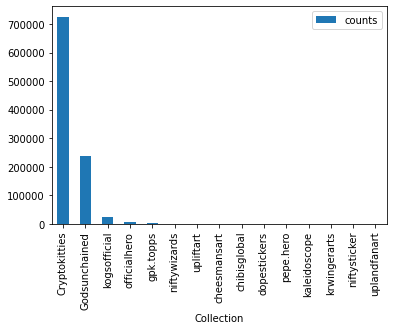

In [105]:
ax=counts.plot.bar(x='Collection',y='counts')

2021-04-27 00:00:00


<AxesSubplot:xlabel='Datetime_updated'>

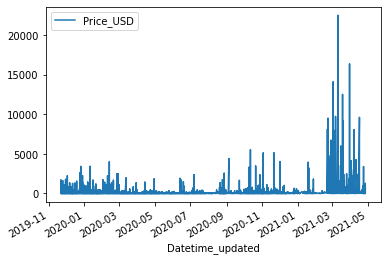

In [106]:
price_data=category_subset[['Datetime_updated','Price_USD']]
print(price_data['Datetime_updated'].max())
price_data.set_index('Datetime_updated',inplace=True)
price_data.plot.line()

In [107]:
category_subset=data2[data2['Category']=="Games"]
counts=category_subset['Collection'].value_counts().rename_axis('Collection').reset_index(name='counts')

In [108]:
category_subset['ID_token']

0         8.709472e+07
1         7.304464e+07
2         1.710748e+07
3         8.223086e+07
4         4.092544e+07
              ...     
999994    1.099512e+12
999995    1.099512e+12
999996    1.099512e+12
999998    1.099512e+12
999999    1.099512e+12
Name: ID_token, Length: 260665, dtype: float64

In [109]:
collections=list(category_subset['Collection'].value_counts().index)
collections

['Godsunchained', 'kogsofficial', 'chibisglobal']

In [110]:
collection_subset=category_subset[category_subset['Collection']=='Godsunchained']

In [111]:
collection_subset

,ID_token,Seller_address,Buyer_address,Image_url_1,Price_Crypto,Crypto,Price_USD,Collection,Datetime_updated,Datetime_updated_seconds,Category
0,87094722.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,https://card.godsunchained.com/?id=33&q=4,0.000200,ETH,0.030318,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
1,73044643.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=79&q=4,0.001300,ETH,0.197067,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
2,17107482.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,https://card.godsunchained.com/?id=33&q=4,0.000200,ETH,0.030318,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
3,82230857.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=227&q=4,0.002200,ETH,0.333498,Godsunchained,2019-11-30,2019-11-30 23:59:33,Games
4,40925443.0,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,https://card.godsunchained.com/?id=62&q=4,0.001200,ETH,0.181908,Godsunchained,2019-11-30,2019-11-30 23:58:44,Games
...,...,...,...,...,...,...,...,...,...,...,...
236205,20795442.0,0xb04239b53806ab31141e6cd47c63fb3480cac908,0x8011680d8e3b2fbdd7a552006eab30569b20d0bb,https://card.godsunchained.com/?id=372&q=4,0.000800,ETH,1.637444,Godsunchained,2021-04-02,2021-04-02 22:17:49,Games
236206,112665284.0,0x6958f5e95332d93d21af0d7b9ca85b8212fee0a5,0x46cb6e53ffb34deabfbe585bbb713d062706d984,https://card.godsunchained.com/?id=155&q=4,0.047777,ETH,97.790202,Godsunchained,2021-04-02,2021-04-02 15:02:57,Games
236207,13135799.0,0xb04239b53806ab31141e6cd47c63fb3480cac908,0x791682a63098e26d999a18c7675c23e104ec0ebf,https://card.godsunchained.com/?id=231&q=4,0.020000,ETH,40.936100,Godsunchained,2021-04-02,2021-04-02 10:12:18,Games
236208,81912982.0,0x6958f5e95332d93d21af0d7b9ca85b8212fee0a5,0x9254f7f72bc6294ad6569d1ab78139121db880f6,https://card.godsunchained.com/?id=27&q=4,0.064700,ETH,132.428283,Godsunchained,2021-04-02,2021-04-02 05:33:49,Games


In [112]:
ID=list(collection_subset['ID_token'].unique())[:20]
ID

[87094722.0,
 73044643.0,
 17107482.0,
 82230857.0,
 40925443.0,
 43107083.0,
 7713824.0,
 45951791.0,
 5400581.0,
 117891743.0,
 12585149.0,
 1730148.0,
 103347699.0,
 1712718.0,
 14463019.0,
 11813239.0,
 31585252.0,
 91458227.0,
 71916386.0,
 71916250.0]

In [35]:
x=collection_subset[collection_subset['ID_token']==1730148.0]
image=x['Image_url_1'].values
image[0]

'https://card.godsunchained.com/?id=27&q=4'

In [40]:
data2.to_csv('data2.csv')

# Model Building

In [113]:
data_model=data2.drop(columns=['ID_token','Seller_address','Buyer_address','Image_url_1'],axis=1)
data_model=data_model[['Datetime_updated','Datetime_updated_seconds','Crypto','Collection','Category','Price_Crypto','Price_USD']]

In [114]:
data_model.head()

,Datetime_updated,Datetime_updated_seconds,Crypto,Collection,Category,Price_Crypto,Price_USD
0,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0002,0.030318
1,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0013,0.197067
2,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0002,0.030318
3,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0022,0.333498
4,2019-11-30,2019-11-30 23:58:44,ETH,Godsunchained,Games,0.0012,0.181908


In [39]:
data_model['Collection'].value_counts()

Cryptokitties    725400
Godsunchained    236210
kogsofficial      24216
officialhero       6307
gpk.topps          3393
niftywizards        810
upliftart           322
cheesmansart        272
chibisglobal        239
dopestickers        179
pepe.hero           179
kaleidoscope        141
krwingerarts        139
niftysticker        122
uplandfanart         88
Name: Collection, dtype: int64

In [40]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998017 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Datetime_updated          998017 non-null  datetime64[ns]
 1   Datetime_updated_seconds  998017 non-null  datetime64[ns]
 2   Crypto                    998017 non-null  object        
 3   Collection                998017 non-null  object        
 4   Category                  998017 non-null  object        
 5   Price_Crypto              998017 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.3+ MB


## Linear Regression

In [ ]:
import datetime as dt
import time
data_model1=data_model.copy()
# data_model1['Datetime_updated']=pd.to_datetime(data_model1['Datetime_updated'])
data_model1['Datetime_updated']=data_model1['Datetime_updated'].map(dt.datetime.toordinal)
data_model1['Datetime_updated_seconds'] = data_model1['Datetime_updated_seconds'].apply(lambda  var: time.mktime(var.timetuple()))

from sklearn.model_selection import train_test_split
x=data_model1[['Datetime_updated','Datetime_updated_seconds','Crypto','Collection','Category']]
x= pd.get_dummies(x, columns = ['Crypto','Collection','Category'])
y=data_model1['Price_Crypto']
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [ ]:
x_train

,Datetime_updated,Datetime_updated_seconds,Crypto_ETH,Crypto_WAX,Collection_Cryptokitties,Collection_Godsunchained,Collection_cheesmansart,Collection_chibisglobal,Collection_dopestickers,Collection_gpk.topps,...,Collection_niftysticker,Collection_niftywizards,Collection_officialhero,Collection_pepe.hero,Collection_uplandfanart,Collection_upliftart,Category_Art,Category_Collectible,Category_Games,Category_Other
669165,2018-08-21,2018-08-21 20:18:57,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
502004,2018-01-20,2018-01-20 19:27:03,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
347306,2017-12-12,2017-12-12 10:38:27,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
300948,2017-12-17,2017-12-17 00:48:29,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
576580,2018-03-11,2018-03-11 07:32:41,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864087,2019-08-20,2019-08-20 14:51:29,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
778087,2019-01-14,2019-01-14 00:09:31,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
210755,2020-03-29,2020-03-29 18:51:21,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
56088,2019-11-22,2019-11-22 16:11:22,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_train

669165    0.290338
502004    0.008562
347306    0.031020
300948    0.099000
576580    0.033877
            ...   
864087    0.001613
778087    0.003214
210755    0.001100
56088     0.065900
824840    0.004036
Name: Price_Crypto, Length: 748512, dtype: float64

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression(normalize=True) # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(x_train, y_train)
predicted = regr.predict(x_test)

In [ ]:
predicted

array([ 0.3671875 ,  0.328125  ,  0.30078125, ...,  0.37109375,
       -1.02734375,  0.2734375 ])

In [ ]:
y_test

682221    0.065618
105639    0.004200
918116    0.000900
352995    0.008137
928913    0.002465
            ...   
292609    0.005000
428551    0.042635
878708    0.001641
956152    0.007860
546462    0.248821
Name: Price_Crypto, Length: 249505, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae = mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
print(mae,mse,rmse)
r2_score(y_test,predicted)

7.910182589568812 7409.274154019695 86.07714071703181


0.14965084001538909

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=500, random_state=81)
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=500, random_state=81)

In [ ]:
y_pred = regr.predict(x_test)
y_pred

array([0.03886208, 0.00254738, 0.00151002, ..., 0.00410692, 0.00786531,
       0.00530203])

In [ ]:
y_test

682221    0.065618
105639    0.004200
918116    0.000900
352995    0.008137
928913    0.002465
            ...   
292609    0.005000
428551    0.042635
878708    0.001641
956152    0.007860
546462    0.248821
Name: Price_Crypto, Length: 249505, dtype: float64

In [ ]:
errors = abs(y_pred - y_test)
errors

682221    0.026756
105639    0.001653
918116    0.000610
352995    0.031096
928913    0.004720
            ...   
292609    0.022367
428551    0.112079
878708    0.002466
956152    0.000005
546462    0.243519
Name: Price_Crypto, Length: 249505, dtype: float64

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred)
mse_rf1 = np.square(np.subtract(y_test,y_pred)).mean()
rmse_rf = np.sqrt(mse)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)

Mean Squared Error: 7699.271074198636
Root Mean Squared Error: 86.07714071703181


##XGBoost Model

In [ ]:
# define model
from xgboost import XGBRegressor
model = XGBRegressor()

In [ ]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
# Instantiation
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [ ]:
xgb_r.fit(x_train, y_train)

[22:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=10, seed=123)

In [ ]:
pred = xgb_r.predict(x_test)
pred

array([0.21315473, 0.20423749, 0.20423749, ..., 0.20423749, 0.24088442,
       0.21315473], dtype=float32)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  82.561187


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

5.8427624002374925

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.21769973744465787

In [43]:
data_model

,Datetime_updated,Datetime_updated_seconds,Crypto,Collection,Category,Price_Crypto
0,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0002
1,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0013
2,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0002
3,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0022
4,2019-11-30,2019-11-30 23:58:44,ETH,Godsunchained,Games,0.0012
...,...,...,...,...,...,...
999994,2020-08-20,2020-08-20 19:15:19,WAX,kogsofficial,Games,333.0000
999995,2020-08-20,2020-08-20 19:14:51,WAX,kogsofficial,Games,50.0000
999996,2020-08-20,2020-08-20 19:14:36,WAX,kogsofficial,Games,50.0000
999998,2020-08-20,2020-08-20 19:12:33,WAX,kogsofficial,Games,30.0000


In [151]:
data_lstm=data_model.copy()
data_lstm.head()

,Datetime_updated,Datetime_updated_seconds,Crypto,Collection,Category,Price_Crypto,Price_USD
0,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0002,0.030318
1,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0013,0.197067
2,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0002,0.030318
3,2019-11-30,2019-11-30 23:59:33,ETH,Godsunchained,Games,0.0022,0.333498
4,2019-11-30,2019-11-30 23:58:44,ETH,Godsunchained,Games,0.0012,0.181908


In [152]:
data_lstm=data_lstm[['Datetime_updated_seconds','Category','Price_USD']]
data_lstm.set_index('Datetime_updated_seconds',inplace=True)

In [143]:
data_lstm.to_csv('data_lstm.csv')

In [153]:
data_lstm=data_lstm[data_lstm['Category']=='Art']
data_lstm.drop(['Category'],axis=1,inplace=True)
data_lstm.shape

(725400, 1)

In [154]:
train = data_lstm.iloc[:10000]
test = data_lstm.iloc[10000:10024]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_lstm)
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

StandardScaler()

In [155]:
import keras
from sklearn.preprocessing import StandardScaler
n_input=7
n_features=1
model=keras.models.load_model("lstm_model")
test_predictions = []

first_eval_batch = scaler.transform(np.array(data_lstm[-n_input:]))
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(30): # since 1 month
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [156]:
test_predictions

[array([1.3236516], dtype=float32),
 array([1.3232512], dtype=float32),
 array([1.3238195], dtype=float32),
 array([1.3625758], dtype=float32),
 array([1.1616662], dtype=float32),
 array([1.1107836], dtype=float32),
 array([1.0851421], dtype=float32),
 array([1.0726783], dtype=float32),
 array([1.0472991], dtype=float32),
 array([1.0189874], dtype=float32),
 array([0.9848388], dtype=float32),
 array([0.940304], dtype=float32),
 array([0.9086131], dtype=float32),
 array([0.8801153], dtype=float32),
 array([0.851084], dtype=float32),
 array([0.8198565], dtype=float32),
 array([0.7867757], dtype=float32),
 array([0.751746], dtype=float32),
 array([0.71503717], dtype=float32),
 array([0.6789323], dtype=float32),
 array([0.6424544], dtype=float32),
 array([0.6045427], dtype=float32),
 array([0.5661547], dtype=float32),
 array([0.5271629], dtype=float32),
 array([0.48831892], dtype=float32),
 array([0.4499431], dtype=float32),
 array([0.4123928], dtype=float32),
 array([0.37552583], dtype=fl

In [157]:
true_forecast = scaler.inverse_transform(test_predictions)
price_forecast=true_forecast/135
price_forecast

array([[7.530806 ],
       [7.5286255],
       [7.5317206],
       [7.742818 ],
       [6.6485057],
       [6.3713593],
       [6.2316957],
       [6.163808 ],
       [6.025573 ],
       [5.871365 ],
       [5.6853647],
       [5.442793 ],
       [5.2701797],
       [5.1149583],
       [4.956831 ],
       [4.7867413],
       [4.606557 ],
       [4.415758 ],
       [4.2158127],
       [4.0191574],
       [3.8204699],
       [3.6139724],
       [3.4048815],
       [3.1925015],
       [2.9809265],
       [2.7719014],
       [2.567373 ],
       [2.3665664],
       [2.1741967],
       [1.9916606]], dtype=float32)

In [128]:
dates=[]
import datetime
datelist = pd.date_range(datetime.datetime.today(), periods=30).tolist()
for i in datelist:
    dates.append(str(i.date()))

In [158]:
forecast_df=pd.DataFrame(dates,columns=['Date'])
forecast_df['Price']=price_forecast
forecast_df.set_index('Date',inplace=True)
forecast_df

,Price
Date,
2022-11-04,7.530806
2022-11-05,7.528625
2022-11-06,7.531721
2022-11-07,7.742818
2022-11-08,6.648506
2022-11-09,6.371359
2022-11-10,6.231696
2022-11-11,6.163808
2022-11-12,6.025573
